Module-1, 2, 3 and 4 are done in Joplin, its PDF is in the same directory as this.. please refer to that PDF

# Module-5: Lecture 05 - Introduction to Networkx-1 (10 min)

In [1]:
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

In [2]:
!pip install networkx

     |████████████████████████████████| 1.9 MB 2.3 MB/s eta 0:00:01


In [3]:
import networkx as nx

In [6]:
G = nx.Graph()
for i in range(1, 5+1):
    G.add_node(i)
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [10]:
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(2, 3)
G.add_edge(2, 6)
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (2, 6), (4, 6), (4, 5)])

In [11]:
import matplotlib.pyplot as plt

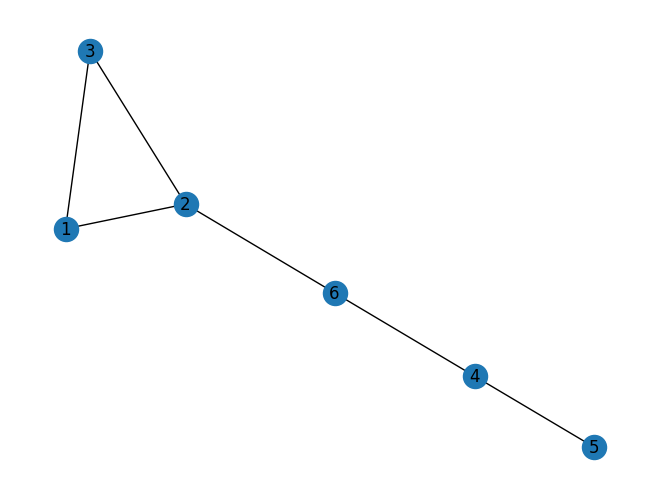

In [15]:
nx.draw(G, with_labels=1)
plt.show()

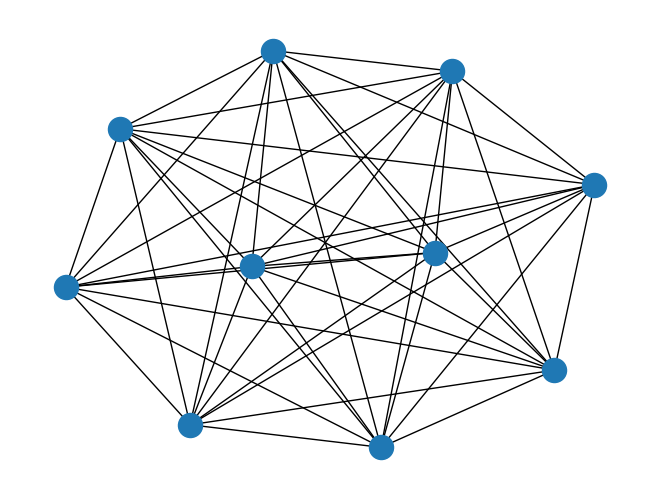

In [17]:
Z = nx.complete_graph(10)
nx.draw(Z)
plt.show()

In [18]:
Z.order() # how many nodes

10

In [19]:
Z.size() # How many edges

45

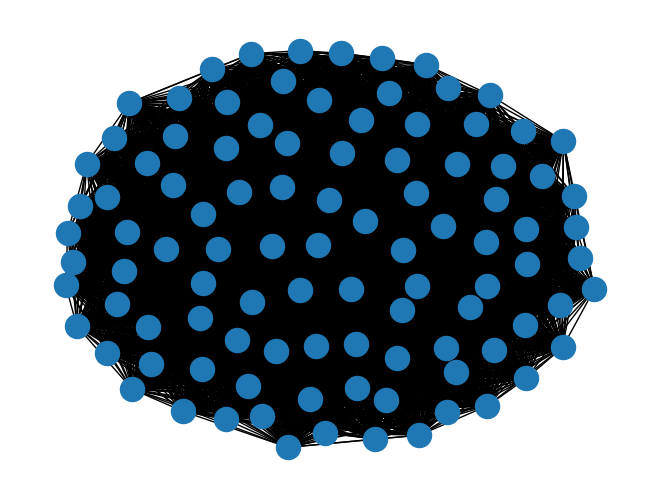

In [21]:
H = nx.complete_graph(100)
nx.draw(H)
plt.show()

In [22]:
G = nx.gnp_random_graph(20, 0.5)  # Generate a graph with 20 edges, connect the edges with 0.5 probability(also means that, don't keep a edge with probability 1-0.5=0.5)
# Illustration: Say There are 20 people, and they decide to make a friendship by tossing a coin. Like if HEADS - Friends, else (tail)  not..

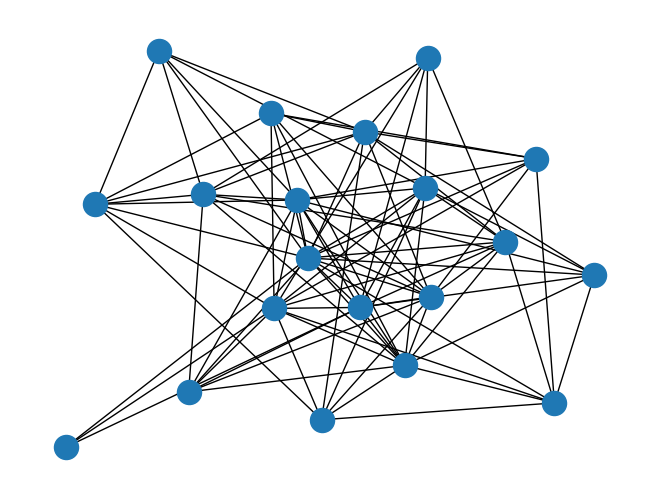

In [23]:
nx.draw(G)
plt.show()

## Lecture 06 - Introduction to Networkx-2 (45 min)

### Modelling Road networks in India 
 -- anlogical to the TSP: Travelling SalesMan Problem in Algorithm course.

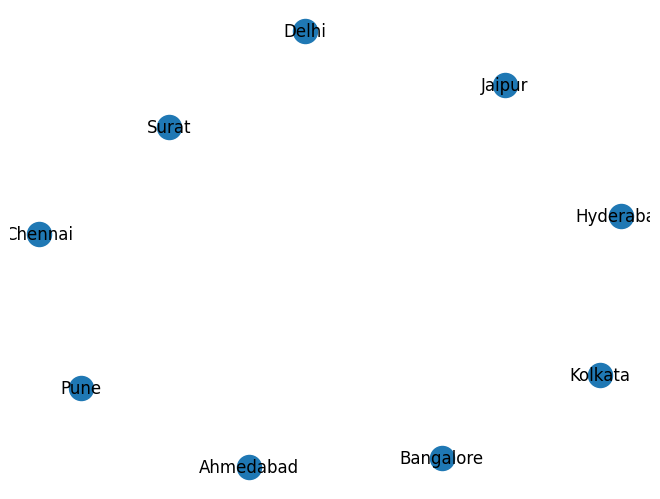

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
G= nx.Graph()   # an Undirected Graph..

# List of cites -- becomes nodes of the graph..
cities = ["Delhi", "Bangalore", "Hyderabad", "Ahmedabad", "Chennai", "Kolkata", "Surat", "Pune", "Jaipur"]

# Adding the cities to the graph..
for city in cities:
    G.add_node(city)
    

# Visualzing the graph..
nx.draw(G, with_labels=1)
plt.show()

In [84]:
# Preparing the travelling costs list..
costs = []
value = 100

while value<=2000:
    costs.append(value)
    value = value + 100
# costs

Adding _(say)_ 16 edges to two random cities with randomly selected cost..

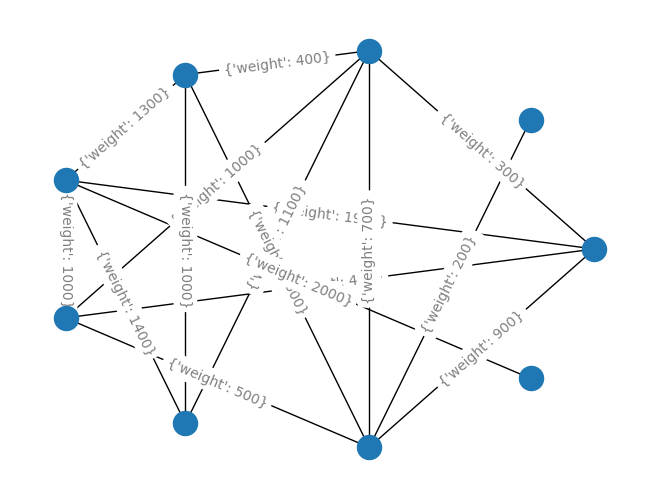

In [85]:
import random
while(G.number_of_edges()<16):
    city1, city2 = random.choice(cities), random.choice(cities)
    if city1 != city2 and G.has_edge(city1, city2) == False:  # Only when both randomly selected cities aren't same and there doesn't exist an edge between those already..
        G.add_edge(city1, city2, weight=random.choice(costs))

## Let's visualize with spectral-layout..
pos = nx.circular_layout(G)  # spectral_layout(), spring_layout()
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos, alpha=0.5)#, clip_on=False, rotate=True)
plt.show()

Let's verify the connectedness in the graph..

In [87]:
nx.is_connected(G)

True

Let's see it..

In [89]:

for city1 in G.nodes():
    for city2 in G.nodes():
        #print(city1, city2, G.has_edge(city1, city2))
        

SyntaxError: unexpected EOF while parsing (<ipython-input-89-f4755b203679>, line 4)

In [88]:
nx.is_connected(G)

True

### Wrap-up code..

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_network(cities, costs, num_edges):
    G= nx.Graph()   # an Undirected Graph..

    # Adding the cities to the graph..
    for city in cities:
        G.add_node(city)
        
    # Adding the edges to the graph..
    while(G.number_of_edges()<num_edges):
        city1, city2 = random.choice(cities), random.choice(cities)
        if city1 != city2 and G.has_edge(city1, city2) == False:  # Only when both randomly selected cities aren't same and there doesn't exist an edge between those already..
            G.add_edge(city1, city2, weight=random.choice(costs))
    
    # Return the final graph
    return G

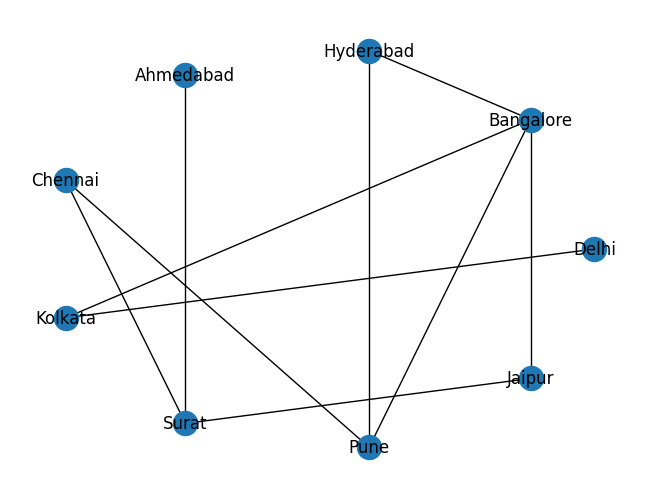

In [101]:
# List of cites -- becomes nodes of the graph..
cities = ["Delhi", "Bangalore", "Hyderabad", "Ahmedabad", "Chennai", "Kolkata", "Surat", "Pune", "Jaipur"]

# Preparing the travelling costs list..
costs = []
value = 100

while value<=2000:
    costs.append(value)
    value = value + 100
    
G = create_network(cities, costs, 10)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

### Let's try-out the various functions in the networksx

In [106]:
# Shortest path between the cities..
nx.dijkstra_path(G, "Ahmedabad", "Hyderabad")

['Ahmedabad', 'Surat', 'Chennai', 'Pune', 'Hyderabad']

In [108]:
# Cost taken..
nx.dijkstra_path_length(G, "Ahmedabad", "Hyderabad")  # How much it costs to travel from "Ahmedabad" to "Hyderabad"..??

5300

In [109]:
# Di
nx.single_source_dijkstra_path(G, "Ahmedabad")  # What are the cities that one can travel from the "Ahmedabad"?

{'Ahmedabad': ['Ahmedabad'],
 'Surat': ['Ahmedabad', 'Surat'],
 'Jaipur': ['Ahmedabad', 'Surat', 'Jaipur'],
 'Chennai': ['Ahmedabad', 'Surat', 'Chennai'],
 'Pune': ['Ahmedabad', 'Surat', 'Chennai', 'Pune'],
 'Bangalore': ['Ahmedabad', 'Surat', 'Jaipur', 'Bangalore'],
 'Hyderabad': ['Ahmedabad', 'Surat', 'Chennai', 'Pune', 'Hyderabad'],
 'Kolkata': ['Ahmedabad', 'Surat', 'Jaipur', 'Bangalore', 'Kolkata'],
 'Delhi': ['Ahmedabad', 'Surat', 'Jaipur', 'Bangalore', 'Kolkata', 'Delhi']}